<a href="https://colab.research.google.com/github/LeaMila/Anna_Balcerzak/blob/main/Bank_Loans_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The aim of this analysis is to provide risk evaluation as a service for retail banks. The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population.

I am responsible for everything product-related, from planning to data analysis to building the solution.

My role is to propose how your proof-of-concept (POC) product should look like:

investigate the dataset and see what you can predict, so you propose that you come up with interesting features to analyze and predict

create a number of different models so that you have a robust and diversified offering when you get your first meeting with the potential clients.

Create a plan for your investigation, analysis, and POC building. This should include your assumptions, overall objectives, and objectives for each step in your plan. You are not expected to have a plan for the whole project but instead have a clear understanding of what you'll try to achieve in the next step and build the plan one step at a time.

Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.

Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.

Use machine learning models to predict the target variables based on your proposed plan. You should use hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. The decision of where to use and not to use these techniques is up to you; however, they should be aligned with your team's objectives.

Deploy these machine learning models to Google Cloud Platform. You are free to choose any deployment option you wish as long as it can be called an HTTP request.

Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
!pip install featuretools
import featuretools as ft
!pip install imbalanced-learn
!pip install --upgrade featuretools
import featuretools as ft
from scipy.stats import ttest_ind, chi2_contingency, stats
import random
from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
!pip install xgboost
import xgboost as xgb
!pip install flask
import flask, joblib, json
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from collections import Counter
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# EDA

Load data, examine shapes, and identify missing values

In [ ]:
app_train = pd.read_csv('/content/application_train.csv')
app_test = pd.read_csv('/content/application_test.csv')
bureau = pd.read_csv('/content/bureau.csv')
bureau_balance = pd.read_csv('/content/bureau_balance.csv')
credit_card_balance = pd.read_csv('/content/credit_card_balance.csv')
installments_payments = pd.read_csv('/content/installments_payments.csv')
pos_cash_balance = pd.read_csv('/content/POS_CASH_balance.csv')
app_previous = pd.read_csv('/content/previous_application.csv')

* app_train

In [ ]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
duplicate_count = app_train.duplicated().sum()
print(f"No of duplicates w app_train: {duplicate_count}")

No of duplicates w app_train: 0


In [ ]:
total_missing = app_train.isnull().sum()
percent_missing = (total_missing / len(app_train)) * 100
missing_values_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
print("All columns with missing data:")
print(missing_values_summary[missing_values_summary['Total Missing'] > 0])

All columns with missing data:
                            Total Missing  Percent Missing
AMT_ANNUITY                            12         0.003902
AMT_GOODS_PRICE                       278         0.090403
NAME_TYPE_SUITE                      1292         0.420148
OWN_CAR_AGE                        202929        65.990810
OCCUPATION_TYPE                     96391        31.345545
...                                   ...              ...
AMT_REQ_CREDIT_BUREAU_DAY           41519        13.501631
AMT_REQ_CREDIT_BUREAU_WEEK          41519        13.501631
AMT_REQ_CREDIT_BUREAU_MON           41519        13.501631
AMT_REQ_CREDIT_BUREAU_QRT           41519        13.501631
AMT_REQ_CREDIT_BUREAU_YEAR          41519        13.501631

[67 rows x 2 columns]


In [ ]:
total_missing = app_train.isnull().sum()
percent_missing = (total_missing / len(app_train)) * 100
columns_to_drop = total_missing[percent_missing > 50].index
columns_to_drop = columns_to_drop.difference(['EXT_SOURCE_1'])
app_train_cleaned = app_train.drop(columns=columns_to_drop)
print(f"Number of columns removed: {len(columns_to_drop)}")

Number of columns removed: 40


In [ ]:
def detect_outliers_iqr(data):
    outlier_summary = {}
    numeric_features = data.select_dtypes(include=[np.number]).columns

    for feature in numeric_features:

        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_count = len(outliers)
        outlier_ratio = outlier_count / len(data)
        outlier_summary[feature] = {
            'Outlier Count': outlier_count,
            'Outlier Ratio (%)': round(outlier_ratio * 100, 2)
          }
        outlier_summary_df = pd.DataFrame(outlier_summary).T
    outlier_summary_df.sort_values(by='Outlier Ratio (%)', ascending=False, inplace=True)
    return outlier_summary_df

outlier_summary = detect_outliers_iqr(app_train)
print(outlier_summary)

                             Outlier Count  Outlier Ratio (%)
REGION_RATING_CLIENT               80527.0              26.19
REGION_RATING_CLIENT_W_CITY        78027.0              25.37
DAYS_EMPLOYED                      72217.0              23.48
REG_CITY_NOT_WORK_CITY             70867.0              23.05
FLAG_WORK_PHONE                    61308.0              19.94
...                                    ...                ...
FLAG_DOCUMENT_3                        0.0               0.00
FLAG_DOCUMENT_12                       2.0               0.00
FLAG_PHONE                             0.0               0.00
FLAG_DOCUMENT_10                       7.0               0.00
SK_ID_CURR                             0.0               0.00

[106 rows x 2 columns]


* app_test

In [ ]:
app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
app_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
total_missing = app_test.isnull().sum()
percent_missing = (total_missing / len(app_test)) * 100
missing_values_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
print("All columns with missing data:")
print(missing_values_summary[missing_values_summary['Total Missing'] > 0])

All columns with missing data:
                            Total Missing  Percent Missing
AMT_ANNUITY                            24         0.049237
NAME_TYPE_SUITE                       911         1.868948
OWN_CAR_AGE                         32312        66.289184
OCCUPATION_TYPE                     15605        32.014197
EXT_SOURCE_1                        20532        42.122107
...                                   ...              ...
AMT_REQ_CREDIT_BUREAU_DAY            6049        12.409732
AMT_REQ_CREDIT_BUREAU_WEEK           6049        12.409732
AMT_REQ_CREDIT_BUREAU_MON            6049        12.409732
AMT_REQ_CREDIT_BUREAU_QRT            6049        12.409732
AMT_REQ_CREDIT_BUREAU_YEAR           6049        12.409732

[64 rows x 2 columns]


In [ ]:
total_missing = app_test.isnull().sum()
percent_missing = (total_missing / len(app_test)) * 100
columns_to_drop = total_missing[percent_missing > 50].index
app_test_cleaned = app_test.drop(columns=columns_to_drop)
print(f"Number of columns removed: {len(columns_to_drop)}")

Number of columns removed: 29


In [ ]:
duplicate_count = app_test.duplicated().sum()
print(f"No of duplicates: {duplicate_count}")

No of duplicates: 0


In [ ]:
def detect_outliers_iqr(data):
    outlier_summary = {}
    numeric_features = data.select_dtypes(include=[np.number]).columns
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_count = len(outliers)
        outlier_ratio = outlier_count / len(data)
        outlier_summary[feature] = {
            'Outlier Count': outlier_count,
            'Outlier Ratio (%)': round(outlier_ratio * 100, 2)
        }
    outlier_summary_df = pd.DataFrame(outlier_summary).T
    outlier_summary_df.sort_values(by='Outlier Ratio (%)', ascending=False, inplace=True)
    return outlier_summary_df
outlier_summary = detect_outliers_iqr(app_train)
print(outlier_summary)

                             Outlier Count  Outlier Ratio (%)
REGION_RATING_CLIENT               80527.0              26.19
REGION_RATING_CLIENT_W_CITY        78027.0              25.37
DAYS_EMPLOYED                      72217.0              23.48
REG_CITY_NOT_WORK_CITY             70867.0              23.05
FLAG_WORK_PHONE                    61308.0              19.94
...                                    ...                ...
FLAG_DOCUMENT_3                        0.0               0.00
FLAG_DOCUMENT_12                       2.0               0.00
FLAG_PHONE                             0.0               0.00
FLAG_DOCUMENT_10                       7.0               0.00
SK_ID_CURR                             0.0               0.00

[106 rows x 2 columns]


* bureau

In [ ]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [ ]:
total = bureau.isnull().sum()
percent = (total / len(bureau)) * 100
missing_bureau = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_above_20 = missing_bureau[missing_bureau['Percent'] > 20]
missing_bureau_above_20

,Total,Percent
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_ANNUITY,1226791,71.473490


In [ ]:
total_missing = bureau.isnull().sum()
percent_missing = (total_missing / len(bureau)) * 100

features_to_drop = percent_missing[percent_missing > 50].index
bureau_cleaned = bureau.drop(columns=features_to_drop)

print(f"Number of features removed: {len(features_to_drop)}")
print(f"Shape of cleaned dataset: {bureau_cleaned.shape}")

Number of features removed: 2
Shape of cleaned dataset: (1716428, 15)


In [ ]:
output_file = "bureau_cleaned.csv"
bureau_cleaned.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to '{output_file}'.")

Cleaned dataset saved to 'bureau_cleaned.csv'.


In [ ]:
duplicate_count = bureau.duplicated().sum()
print(f"No of duplicates: {duplicate_count}")

No of duplicates: 0


* bureau_balance

In [ ]:
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [ ]:
if bureau_balance.isnull().values.any():
    print("Missing values.")
else:
    print("No missing values.")

No missing values.


In [ ]:
duplicate_count = bureau_balance.duplicated().sum()
print(f"No of duplicates: {duplicate_count}")

No of duplicates: 0


In [ ]:
def detect_outliers_iqr(bureau_balance):
    outlier_summary = {}
    numeric_features = data.select_dtypes(include=[np.number]).columns
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_count = len(outliers)
        outlier_ratio = outlier_count / len(data)
        outlier_summary[feature] = {
            'Outlier Count': outlier_count,
            'Outlier Ratio (%)': round(outlier_ratio * 100, 2)
        }
    outlier_summary_df = pd.DataFrame(outlier_summary).T
    outlier_summary_df.sort_values(by='Outlier Ratio (%)', ascending=False, inplace=True)
    return outlier_summary_df
    outlier_summary = detect_outliers_iqr(bureau_balance)
    print(outlier_summary)

* installments_payments

In [ ]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
duplicate_count = installments_payments.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


In [ ]:
total_missing = installments_payments.isnull().sum()
percent_missing = (total_missing / len(installments_payments)) * 100
missing_values_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
print("All columns with missing data:")
print(missing_values_summary[missing_values_summary['Total Missing'] > 0])

All columns with missing data:
                    Total Missing  Percent Missing
DAYS_ENTRY_PAYMENT           2905         0.021352
AMT_PAYMENT                  2905         0.021352


* credit_card_balance

In [ ]:
credit_card_balance.head (5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
credit_card_balance.describe ()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [ ]:
duplicate_count = credit_card_balance.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


In [ ]:
total_missing = credit_card_balance.isnull().sum()
percent_missing = (total_missing / len(credit_card_balance)) * 100
missing_values_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
print("All columns with missing data:")
print(missing_values_summary[missing_values_summary['Total Missing'] > 0])

All columns with missing data:
                            Total Missing  Percent Missing
AMT_DRAWINGS_ATM_CURRENT           749816        19.524872
AMT_DRAWINGS_OTHER_CURRENT         749816        19.524872
AMT_DRAWINGS_POS_CURRENT           749816        19.524872
AMT_INST_MIN_REGULARITY            305236         7.948208
AMT_PAYMENT_CURRENT                767988        19.998063
CNT_DRAWINGS_ATM_CURRENT           749816        19.524872
CNT_DRAWINGS_OTHER_CURRENT         749816        19.524872
CNT_DRAWINGS_POS_CURRENT           749816        19.524872
CNT_INSTALMENT_MATURE_CUM          305236         7.948208


* pos_cash_balance

In [ ]:
pos_cash_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
duplicate_count = pos_cash_balance.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


In [ ]:
total_missing = pos_cash_balance.isnull().sum()
percent_missing = (total_missing / len(pos_cash_balance)) * 100
missing_values_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
print("All columns with missing data:")
print(missing_values_summary[missing_values_summary['Total Missing'] > 0])

All columns with missing data:
                       Total Missing  Percent Missing
CNT_INSTALMENT                 26071         0.260675
CNT_INSTALMENT_FUTURE          26087         0.260835




*   app_previous


In [ ]:
app_previous.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
app_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
total_missing = app_previous.isnull().sum()
percent_missing = (total_missing / len(app_previous)) * 100

features_with_missing = percent_missing[percent_missing > 0].index
num_features_with_missing = len(features_with_missing)

features_to_drop = percent_missing[percent_missing > 50].index
app_previous_cleaned = app_previous.drop(columns=features_to_drop)

print(f"Number of features with missing values: {num_features_with_missing}")
print(f"Number of features removed (missing > 50%): {len(features_to_drop)}")
print(f"Shape of cleaned dataset: {app_previous_cleaned.shape}")

output_file = "app_previous_cleaned.csv"
app_previous_cleaned.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to '{output_file}'.")

Number of features with missing values: 16
Number of features removed (missing > 50%): 4
Shape of cleaned dataset: (1670214, 33)
Cleaned dataset saved to 'app_previous_cleaned.csv'.


In [ ]:
duplicate_count = app_previous.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


# Features selection

In [ ]:
def align_train_test(train, test):
    train, test = train.align(test, join='inner', axis=1)
    return train, test

app_train_cleaned, app_test_cleaned = align_train_test(app_train.drop(columns=['TARGET']), app_test)
app_train_cleaned['TARGET'] = app_train['TARGET']

print(f"Train shape after cleaning: {app_train_cleaned.shape}")
print(f"Test shape after cleaning: {app_test_cleaned.shape}")

numeric_train_df = app_train_cleaned.select_dtypes(include=[np.number])
correlations = numeric_train_df.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Train shape after cleaning: (307511, 122)
Test shape after cleaning: (48744, 121)
Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -

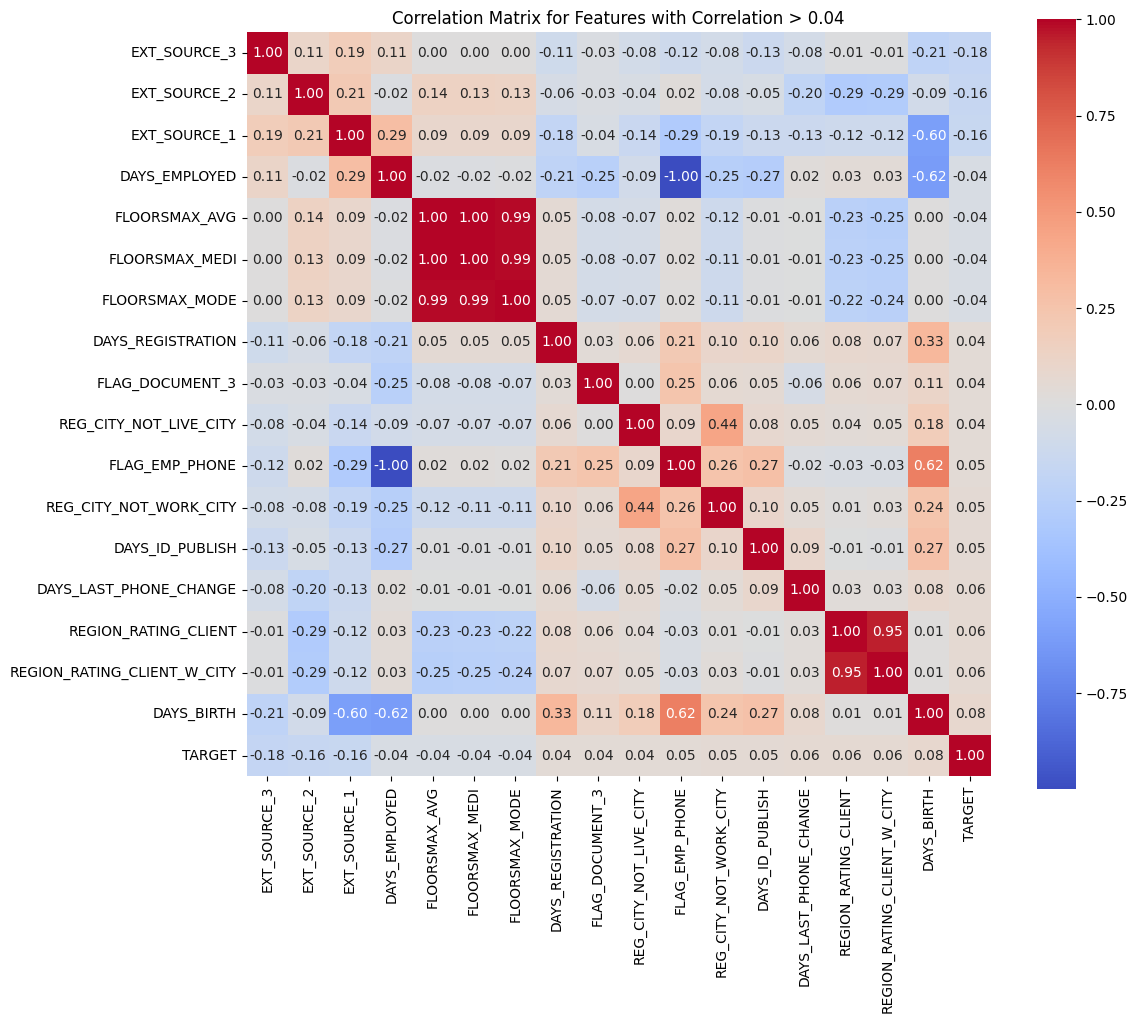

In [ ]:
correlation_threshold = 0.04
filtered_correlations = correlations[correlations.abs() > correlation_threshold]
filtered_features = numeric_train_df[filtered_correlations.index]
filtered_corr_matrix = filtered_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix for Features with Correlation > 0.04")
plt.show()

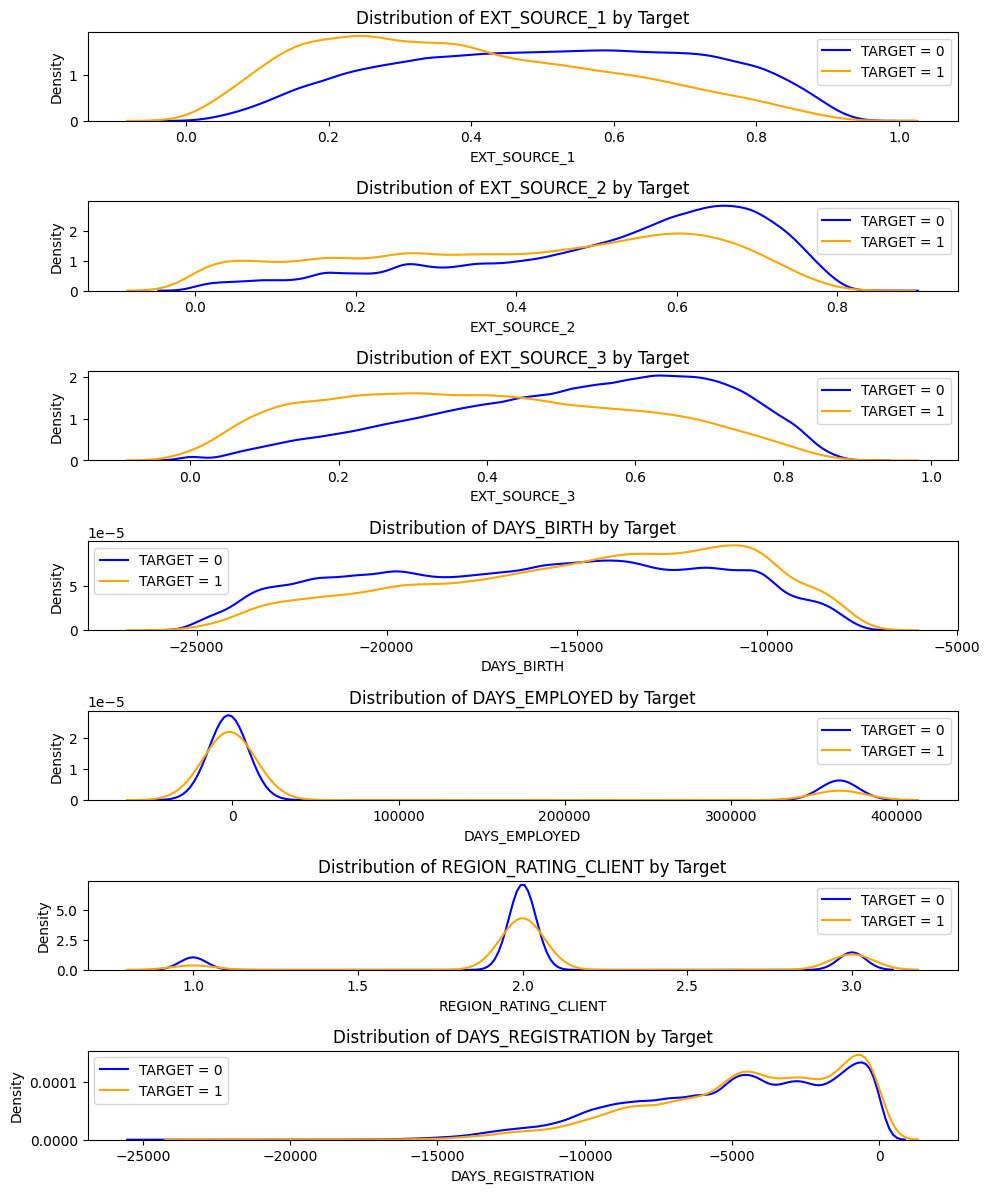

In [ ]:
plt.figure(figsize=(10, 15))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                            'DAYS_BIRTH', 'DAYS_EMPLOYED','REGION_RATING_CLIENT', 'DAYS_REGISTRATION']):
    plt.subplot(9, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='TARGET = 0', color='blue')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='TARGET = 1', color='orange')
    plt.title(f'Distribution of {source} by Target')
    plt.xlabel(source)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

Comments:
- The EXT_SOURCE features provide strong separation between the two target classes.
- Individuals with higher EXT_SOURCE values tend to have better credit behavior (TARGET = 0).
- Lower values across all three features are indicative of increased risk of default (TARGET = 1).
- Younger individuals may be more likely to default compared to older individuals.
- Longer employment durations might be slightly correlated with lower risk of default.

# Feature engeniering

In [ ]:
def align_train_test(train, test):
    train, test = train.align(test, join='inner', axis=1)
    return train, test

app_train_cleaned, app_test_cleaned = align_train_test(app_train.drop(columns=['TARGET']), app_test)

app_train_cleaned['TARGET'] = app_train['TARGET']

print(f"Train shape before cleaning: {app_train_cleaned.shape}")
print(f"Test shape before cleaning: {app_test_cleaned.shape}")

numeric_train_df = app_train_cleaned.select_dtypes(include=[np.number])
correlations = numeric_train_df.corr()['TARGET']

features_to_keep = correlations[(correlations.abs() > 0.04) & (correlations.abs() < 0.9)].index
features_to_remove = numeric_train_df.columns.difference(features_to_keep)

app_train_cleaned = app_train_cleaned[features_to_keep.union(['TARGET'])]
app_test_cleaned = app_test_cleaned[features_to_keep]

print(f"Train shape after cleaning: {app_train_cleaned.shape}")
print(f"Test shape after cleaning: {app_test_cleaned.shape}")

Train shape before cleaning: (307511, 122)
Test shape before cleaning: (48744, 121)
Train shape after cleaning: (307511, 18)
Test shape after cleaning: (48744, 17)


# Hipothesis verifiation
  
Hypotheses for Verification of Statistical Significance for Important Features

- Hypothesis 0 (H₀):
The important features are not statistically significant predictors of the target variable. There is no significant relationship between these features and the target.

- Hypothesis 1 (H₁):
The important features are statistically significant predictors of the target variable. A significant relationship exists between these features and the target.

- Criterion for Significance:
Reject the null hypothesis (H₀) if the p-value < 0.05. This indicates that the relationship between the feature and the target is statistically significant with a confidence level of 95%.

In [ ]:
from scipy.stats import pearsonr

target = 'TARGET'
numeric_features = app_train_cleaned.select_dtypes(include=[np.number]).columns
remaining_features = numeric_features.difference([target])

results = {}
for feature in remaining_features:
    valid_data = app_train_cleaned[[feature, target]].dropna()

    correlation, p_value = pearsonr(valid_data[feature], valid_data[target])
    results[feature] = {
        'Correlation': correlation,
        'P-value': p_value,
        'Significant': p_value < 0.05
    }

results_df = pd.DataFrame(results).T
significant_features_df = results_df[results_df['Significant']]

significant_features_count = len(significant_features_df)
non_significant_features_count = len(results_df) - significant_features_count

print(f"Number of statistically significant features: {significant_features_count}")
print(f"Number of non-significant features: {non_significant_features_count}")

Number of statistically significant features: 17
Number of non-significant features: 0


* Adding addtional features - incorporating all datasets:
    
    - Aggregate Numerical Features in Auxiliary Datase:    - Merge Aggregated Features
    - Join these aggregated datasets with app_train using SK_ID
  - Compute correlations between the aggregated features and TARGET
  - Filter Significant Correlations
  - Retain only features that have statistically significant correlations with TARGET.

In [ ]:
def aggregate_dataset(data, key='SK_ID_CURR', prefix=None):
    numeric_cols = data.select_dtypes(include=[float, int]).columns.difference([key, 'SK_ID_PREV'])

    agg_funcs = ['mean', 'sum', 'min', 'max', 'count']
    aggregated = data.groupby(key)[numeric_cols].agg(agg_funcs)

    if prefix:
        aggregated.columns = [f"{prefix}_{'_'.join(col).strip()}" for col in aggregated.columns]
    else:
        aggregated.columns = ['_'.join(col).strip() for col in aggregated.columns]

    aggregated.reset_index(inplace=True)
    return aggregated

bureau_agg = aggregate_dataset(bureau_cleaned, prefix="bureau")
credit_card_agg = aggregate_dataset(credit_card_balance, prefix="credit_card")
installments_agg = aggregate_dataset(installments_payments, prefix="installments")
pos_cash_agg = aggregate_dataset(pos_cash_balance, prefix="pos_cash")
app_previous_agg = aggregate_dataset(app_previous_cleaned, prefix="app_previous")

app_train_merged = app_train.copy()
datasets_to_merge = [bureau_agg, credit_card_agg, installments_agg, pos_cash_agg, app_previous_agg]

for dataset in datasets_to_merge:
    app_train_merged = app_train_merged.merge(dataset, on='SK_ID_CURR', how='left')

numeric_train_df = app_train_merged.select_dtypes(include=[float, int])
correlations = numeric_train_df.corr()['TARGET'].sort_values()

important_correlations = correlations[(correlations.abs() > 0.03) & (correlations.abs() < 0.9)]

print("Most Positive Correlations:")
print(important_correlations.tail(20))

print("\nMost Negative Correlations:")
print(important_correlations.head(20))

important_correlations.to_csv("important_correlations.csv", header=True)
print("Important correlations saved to 'important_correlations.csv'.")

Most Positive Correlations:
credit_card_CNT_DRAWINGS_ATM_CURRENT_max     0.063729
credit_card_AMT_INST_MIN_REGULARITY_max      0.063888
credit_card_AMT_BALANCE_min                  0.064163
credit_card_AMT_RECEIVABLE_PRINCIPAL_max     0.066919
credit_card_AMT_RECIVABLE_max                0.068066
credit_card_AMT_TOTAL_RECEIVABLE_max         0.068081
credit_card_AMT_BALANCE_max                  0.068798
bureau_DAYS_CREDIT_UPDATE_mean               0.068927
credit_card_CNT_DRAWINGS_POS_CURRENT_max     0.068942
credit_card_AMT_INST_MIN_REGULARITY_mean     0.073724
bureau_DAYS_CREDIT_min                       0.075248
DAYS_BIRTH                                   0.078239
credit_card_CNT_DRAWINGS_CURRENT_mean        0.082520
credit_card_AMT_RECEIVABLE_PRINCIPAL_mean    0.086062
credit_card_AMT_RECIVABLE_mean               0.086478
credit_card_AMT_TOTAL_RECEIVABLE_mean        0.086490
credit_card_AMT_BALANCE_mean                 0.087177
bureau_DAYS_CREDIT_mean                      0.089729


In [ ]:
number_of_features = important_correlations.shape[0]
print(f"Liczba features w important_correlations: {number_of_features}")

Liczba features w important_correlations: 135


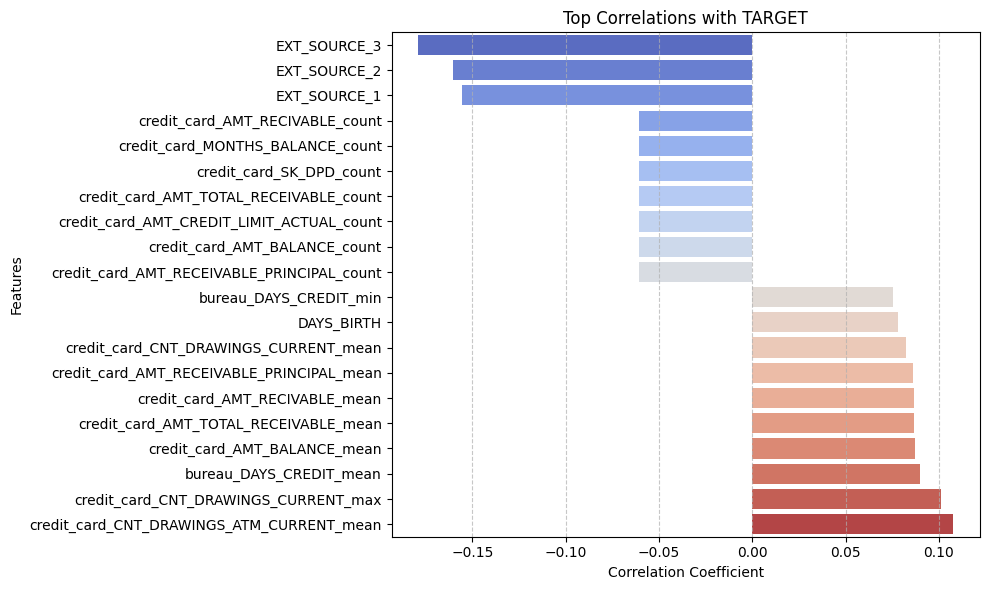

In [ ]:
sorted_correlations = important_correlations.abs().sort_values(ascending=False)

top_positive = important_correlations.tail(10)
top_negative = important_correlations.head(10) # Fixed: Combined 'important' and '_correlations'

combined_top = pd.concat([top_negative, top_positive])

plt.figure(figsize=(10, 6))
sns.barplot(x=combined_top.values, y=combined_top.index, palette="coolwarm")
plt.title('Top Correlations with TARGET')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Filtered features for plotting: ['credit_card_CNT_DRAWINGS_CURRENT_mean', 'credit_card_AMT_RECEIVABLE_PRINCIPAL_mean', 'credit_card_AMT_RECIVABLE_mean', 'credit_card_AMT_TOTAL_RECEIVABLE_mean', 'credit_card_AMT_BALANCE_mean', 'bureau_DAYS_CREDIT_mean', 'credit_card_CNT_DRAWINGS_CURRENT_max', 'credit_card_CNT_DRAWINGS_ATM_CURRENT_mean']


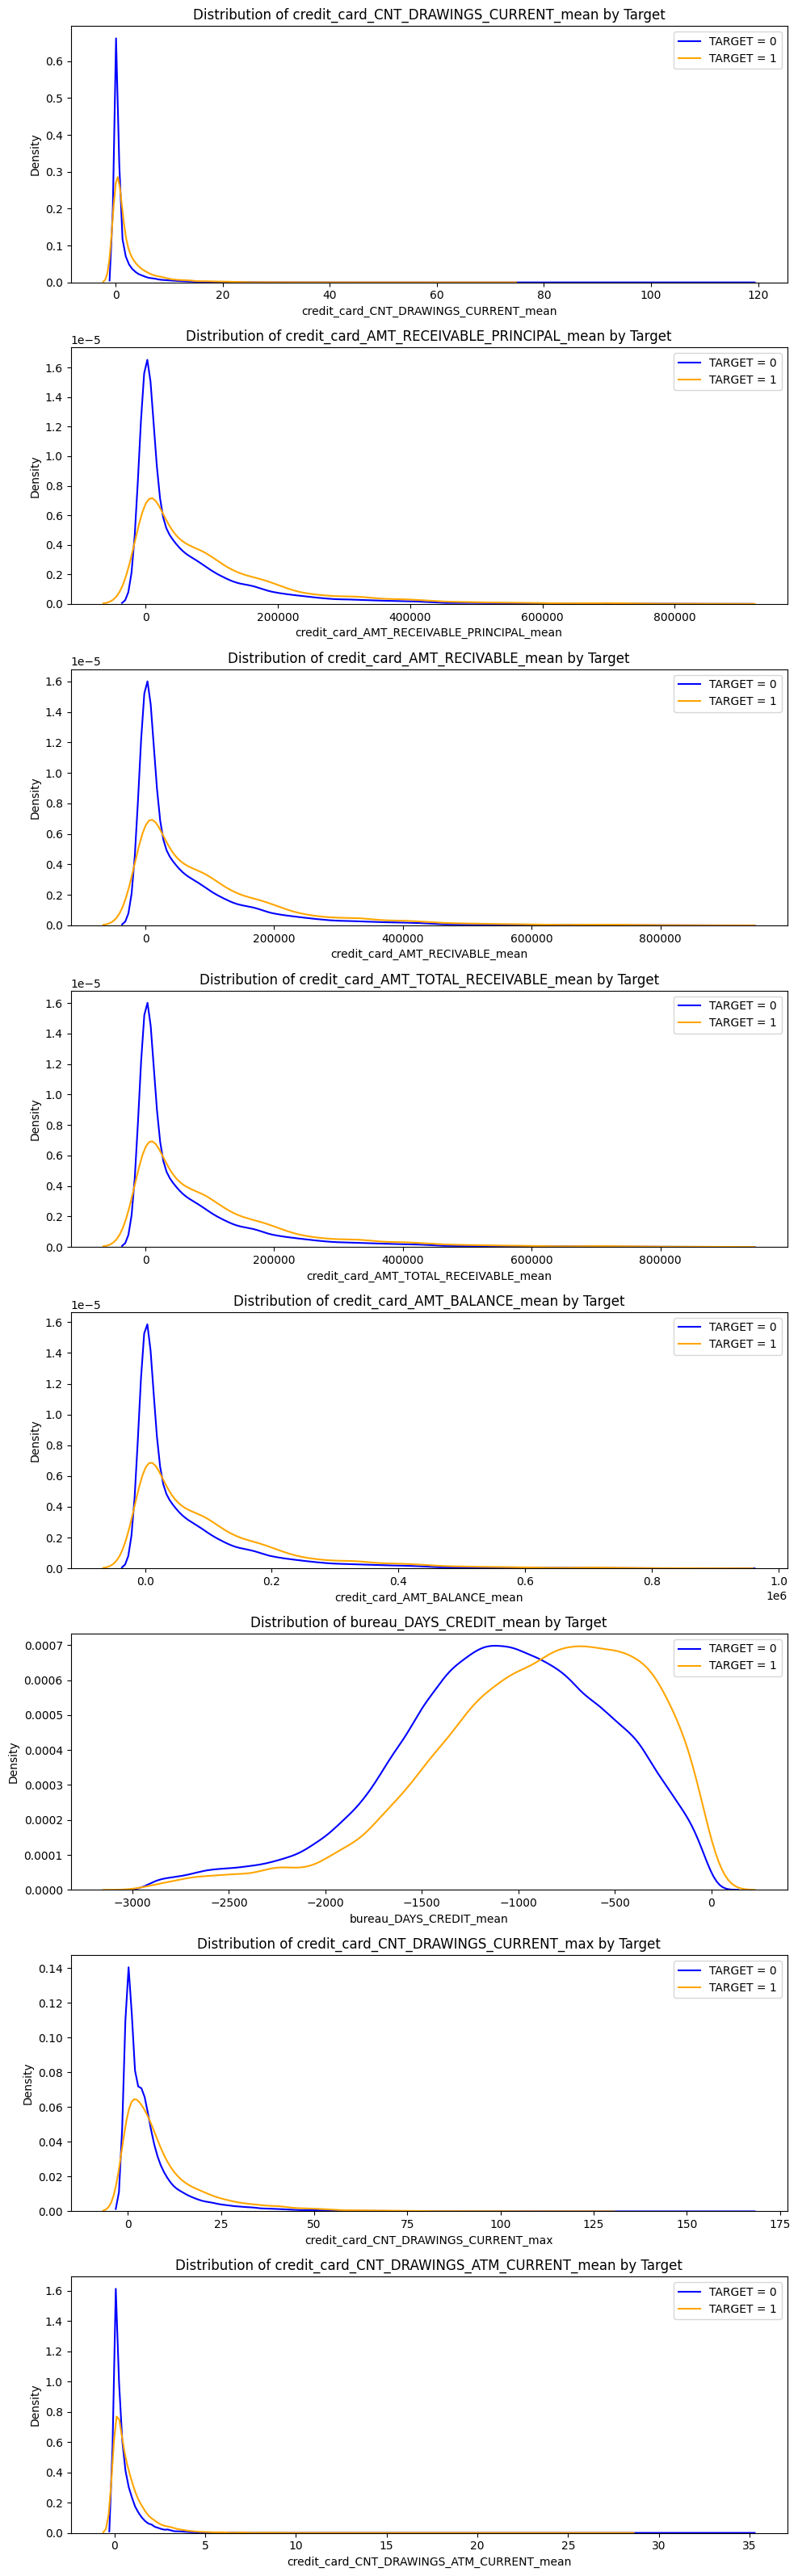

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to visualize
features_to_plot = [
    'credit_card_CNT_DRAWINGS_CURRENT_mean',
    'credit_card_AMT_RECEIVABLE_PRINCIPAL_mean',
    'credit_card_AMT_RECIVABLE_mean',  # Check spelling here
    'credit_card_AMT_TOTAL_RECEIVABLE_mean',
    'credit_card_AMT_BALANCE_mean',
    'bureau_DAYS_CREDIT_mean',
    'credit_card_CNT_DRAWINGS_CURRENT_max',
    'credit_card_CNT_DRAWINGS_ATM_CURRENT_mean'
]

# Filter only valid features present in app_merged
features_to_plot = [f for f in features_to_plot if f in app_train_merged.columns]
print("Filtered features for plotting:", features_to_plot)

# Generate density plots
plt.figure(figsize=(10, len(features_to_plot) * 4))  # Adjust height dynamically
for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i + 1)
    sns.kdeplot(
        data=app_train_merged[app_train_merged['TARGET'] == 0],
        x=feature,
        label='TARGET = 0',
        color='blue'
    )
    sns.kdeplot(
        data=app_train_merged[app_train_merged['TARGET'] == 1],
        x=feature,
        label='TARGET = 1',
        color='orange'
    )
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


Comment:
- Financial Behavior Patterns: Features related to receivables (AMT_RECEIVABLE_PRINCIPAL_mean, AMT_RECIVABLE_mean, etc.) consistently show that higher values are associated with default risk.
- Credit History: A shorter credit history (bureau_DAYS_CREDIT_mean) is a strong indicator of default likelihood.
- Cash Flow Indicators: Limited ATM withdrawals and higher balances may also indicate risky financial situations.

# Target  Distribution

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We first I examine the number of loans falling into each category.

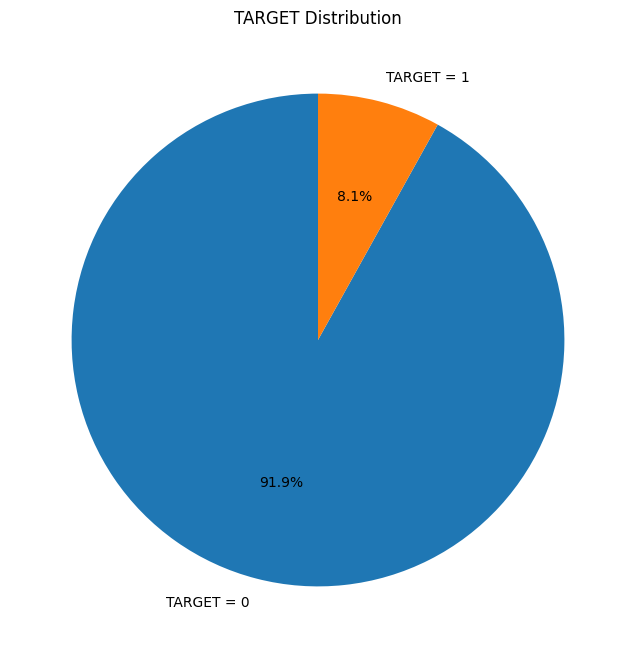

In [ ]:
app_train['TARGET'].value_counts()
value_counts = app_train['TARGET'].value_counts()
labels = value_counts.index.astype(str)
sizes = value_counts.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=[f'TARGET = {label}' for label in labels], autopct='%1.1f%%', startangle=90)
plt.title('TARGET Distribution')
plt.show()

There is huge imbalance in data between customers paying and not paying loans, which requires data balancing models adoption.

In [ ]:
# Load data
data = pd.read_csv("important_correlations.csv")

# Define function to identify outliers using IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to detect features with outliers
def detect_features_with_outliers(df):
    numeric_columns = df.select_dtypes(include=np.number).columns
    print("Numeric columns detected:", numeric_columns)
    features_with_outliers = []
    for col in numeric_columns:
        print(f"Processing column: {col}")
        outliers = identify_outliers_iqr(df, col)
        if not outliers.empty:
            outlier_count = len(outliers)
            total_count = len(df[col])
            outlier_percentage = (outlier_count / total_count) * 100
            features_with_outliers.append({
                'Feature': col,
                'Outlier Count': outlier_count,
                'Outlier Percentage': outlier_percentage
            })

    if features_with_outliers:
        print("\nFeatures with outliers:")
        for feature in features_with_outliers:
            print(f"- {feature['Feature']}: {feature['Outlier Count']} outliers ({feature['Outlier Percentage']:.2f}%)")
    else:
        print("No outliers found in any feature.")

# Call the function
detect_features_with_outliers(data)



Numeric columns detected: Index(['TARGET'], dtype='object')
Processing column: TARGET

Features with outliers:
- TARGET: 1 outliers (0.74%)


* Due to small number and impact I decided to keep outliers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Datasets aggregation - features selection

In [ ]:
bureau_agg_test = aggregate_dataset(bureau_cleaned, prefix="bureau")
credit_card_agg_test = aggregate_dataset(credit_card_balance, prefix="credit_card")
installments_agg_test = aggregate_dataset(installments_payments, prefix="installments")
pos_cash_agg_test = aggregate_dataset(pos_cash_balance, prefix="pos_cash")
app_previous_agg_test = aggregate_dataset(app_previous_cleaned, prefix="app_previous")
app_test_merged = app_test.copy()

datasets_to_merge_test = [bureau_agg_test, credit_card_agg_test, installments_agg_test, pos_cash_agg_test, app_previous_agg_test]

for dataset in datasets_to_merge_test:
    app_test_merged = app_test_merged.merge(dataset, on='SK_ID_CURR', how='left')

app_test_merged.fillna(0, inplace=True)
print(f"Test merged dataset shape: {app_test_merged.shape}")

Test merged dataset shape: (48744, 406)


In [ ]:
train_columns_count = app_train_merged.shape[1]
test_columns_count = app_test_merged.shape[1]

print(f"Liczba kolumn w train_merged: {train_columns_count}")
print(f"Liczba kolumn w test_merged: {test_columns_count}")

Liczba kolumn w train_merged: 407
Liczba kolumn w test_merged: 406


In [ ]:
important_correlations = pd.read_csv("important_correlations.csv", index_col=0)
important_features = important_correlations.index.tolist()

train_reduced = app_train_merged[important_features + ['TARGET']]
test_reduced = app_test_merged[important_features]

print(f"No of collumns in train_reduced: {train_reduced.shape[1]}")
print(f"Liczba kolumn w test_reduced: {test_reduced.shape[1]}")

train_reduced.to_csv("train_reduced.csv", index=False)
test_reduced.to_csv("test_reduced.csv", index=False)

print("Reduced datasets saved successfully!")

No of collumns in train_reduced: 136
Liczba kolumn w test_reduced: 135
Reduced datasets saved successfully!


In [ ]:
# Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_pipeline(train, test):
    # 1. Usunięcie wiodących i końcowych spacji w nazwach kolumn
    train.columns = train.columns.str.strip()
    test.columns = test.columns.str.strip()

    # 2. Zachowanie kolumny TARGET w osobnej zmiennej
    target_col = train['TARGET']  # Przechowanie TARGET
    train = train.drop(columns=['TARGET'])  # Tymczasowe usunięcie TARGET

    non_numeric_columns_train = train.select_dtypes(include=['object', 'category']).columns
    non_numeric_columns_test = test.select_dtypes(include=['object', 'category']).columns

    # 4. Obsługa kolumn nienumerycznych
    # Binary Encoding dla binarnych i One-Hot Encoding dla wieloklasowych
    def encode_non_numeric_columns(df, non_numeric_columns):
        le = LabelEncoder()
        for col in non_numeric_columns:
            if df[col].nunique() == 2:  # Binary encoding
                df[col] = le.fit_transform(df[col].astype(str))
            else:  # One-hot encoding dla wieloklasowych
                df = pd.get_dummies(df, columns=[col], drop_first=True)
        return df

    train = encode_non_numeric_columns(train, non_numeric_columns_train)

    # Kodowanie kolumn w test
    test = encode_non_numeric_columns(test, non_numeric_columns_test)

    # 5. Wyrównanie kolumn między train i test
    common_columns = train.columns.intersection(test.columns)
    train = train[common_columns]
    test = test[common_columns]

    train['TARGET'] = target_col

    print(f"Liczba kolumn w zbiorze treningowym po preprocessing: {train.shape[1]}")
    print(f"Liczba kolumn w zbiorze testowym po preprocessing: {test.shape[1]}")

    return train, test

# Uruchomienie pipeline dla train_reduced i test_reduced
train_final, test_final = preprocess_pipeline(train_reduced, test_reduced)


Liczba kolumn w zbiorze treningowym po preprocessing: 136
Liczba kolumn w zbiorze testowym po preprocessing: 135


In [ ]:
from sklearn.model_selection import train_test_split
X = train_final.drop(columns=['TARGET'])
y = train_final['TARGET']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (246008, 135)
X_test shape: (61503, 135)
y_train shape: (246008,)
y_test shape: (61503,)


# Model Building and evaluation

I selected XGBoost, HistGradientBoosting, Classifier and  LightGBM since:

- they  natively supports missing values encoded as NaNs
- they can handle imbalanced data effectively, but they differ in their approaches and parameters that need to be tun  nment.

Accuracy: 0.43193014974879274
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.39      0.56     56538
           1       0.11      0.89      0.20      4965

    accuracy                           0.43     61503
   macro avg       0.55      0.64      0.38     61503
weighted avg       0.91      0.43      0.53     61503



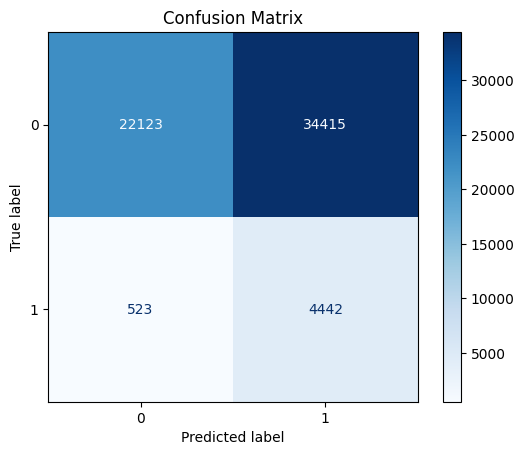

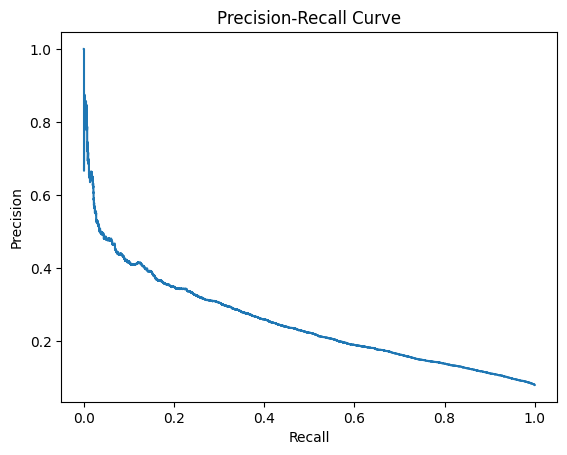


ROC-AUC: 0.7602
Optimal Threshold for F1-Score: 0.6675033894474741


In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

model = HistGradientBoostingClassifier(
    max_iter=500,
    max_depth=7,
    learning_rate=0.05,
    class_weight=class_weight_dict,
    random_state=42
)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.3  # Custom threshold for binary classification
y_pred = (y_pred_proba >= optimal_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC: {roc_auc:.4f}")

f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_index = np.argmax(f1_scores)
print(f"Optimal Threshold for F1-Score: {thresholds[optimal_index]}")

ROC-AUC: 0.7553


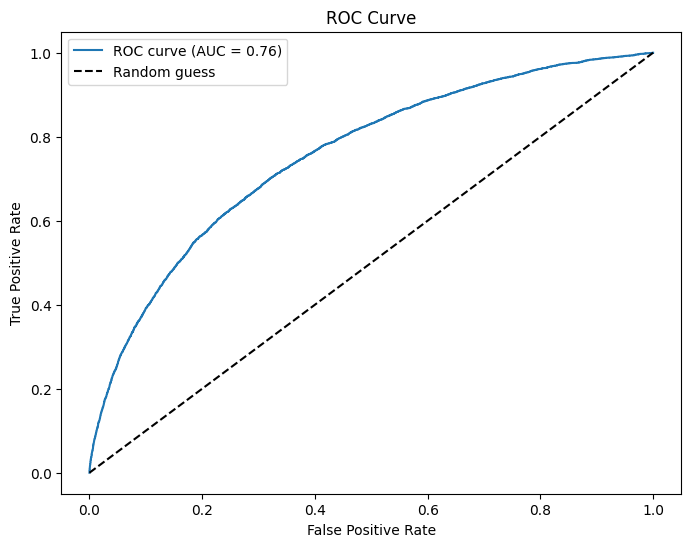

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

* Key findings:
    
- AUC=0.76 indicates that the model performs better than random guessing.    
- Law model accuracy, recall and F1 score  suggests that the model is missing many cases of loan defaults.

* XGBoost model
    - XGBoost - Built-in support for imbalanced datasets.
    - Allows tuning the scale_pos_weight parameter to adjust the weight of classes,
    - Steps in the proces:
    - Compute scale_pos_weight for imbalance handling
    - scale_pos_weight = number of majority class samples / number of minority class samples

Accuracy: 0.8417800757686617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     56538
           1       0.24      0.44      0.31      4965

    accuracy                           0.84     61503
   macro avg       0.59      0.66      0.61     61503
weighted avg       0.89      0.84      0.86     61503



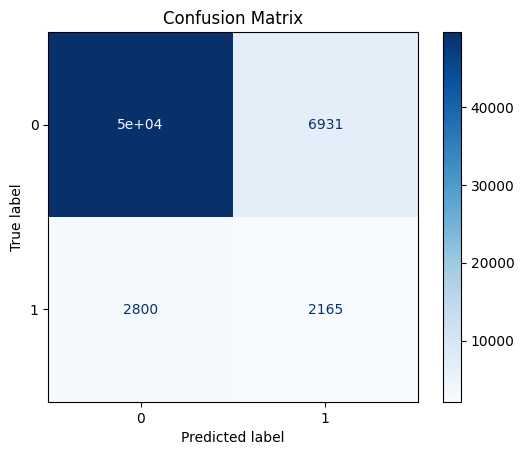

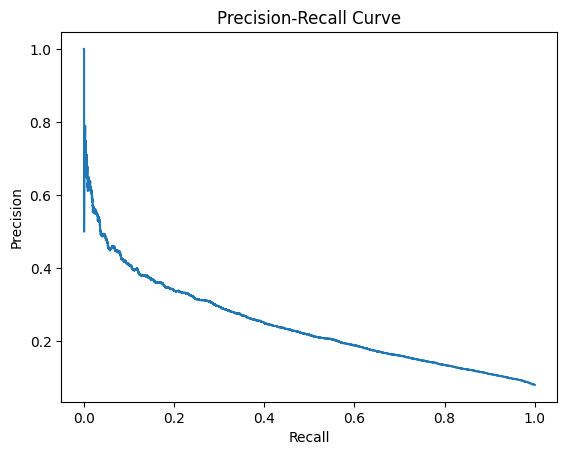

In [ ]:
class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]

model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.6
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

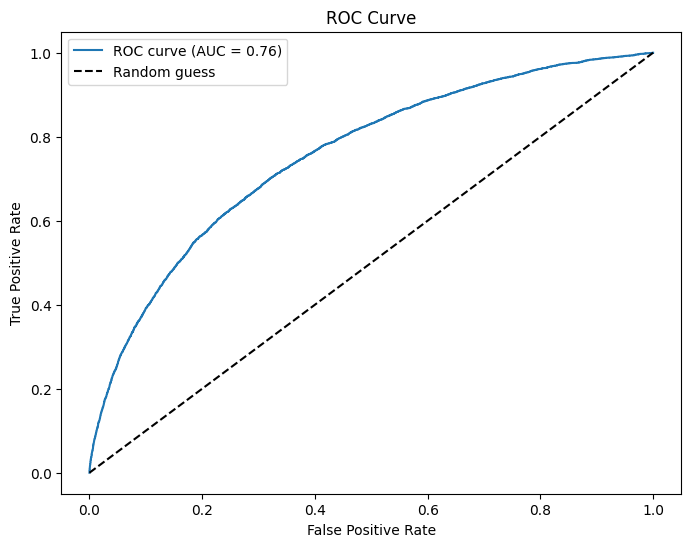

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC: {roc_auc:.4f}")


f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_index = np.argmax(f1_scores)
print(f"Optimal Threshold for F1-Score: {thresholds[optimal_index]}")

In [ ]:
import lightgbm as lgb
from collections import Counter
class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]
model = lgb.LGBMClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    objective='binary',
    random_state=42
)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.6
y_pred = (y_pred_proba >= optimal_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23337
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Accuracy: 0.8178788026600329
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     56538
           1       0.22      0.50      0.31      4965

    accuracy                           0.82     61503
   macro avg       0.59      0.67      0.60     61503
weighted avg       0.89      0.82      0.85     61503



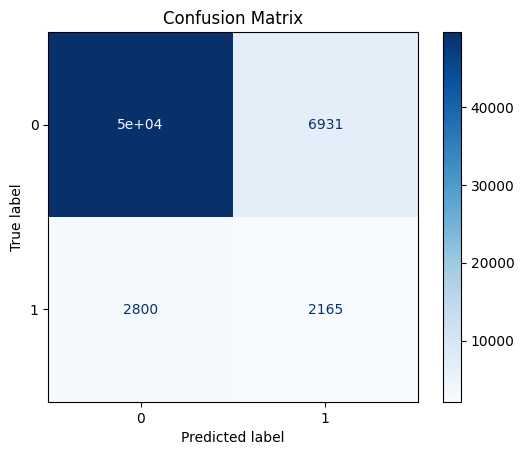

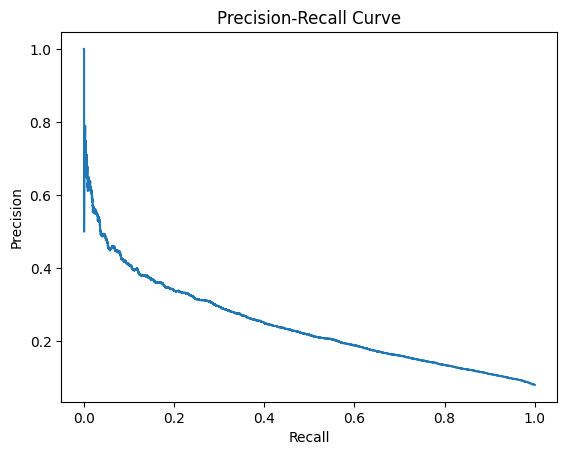

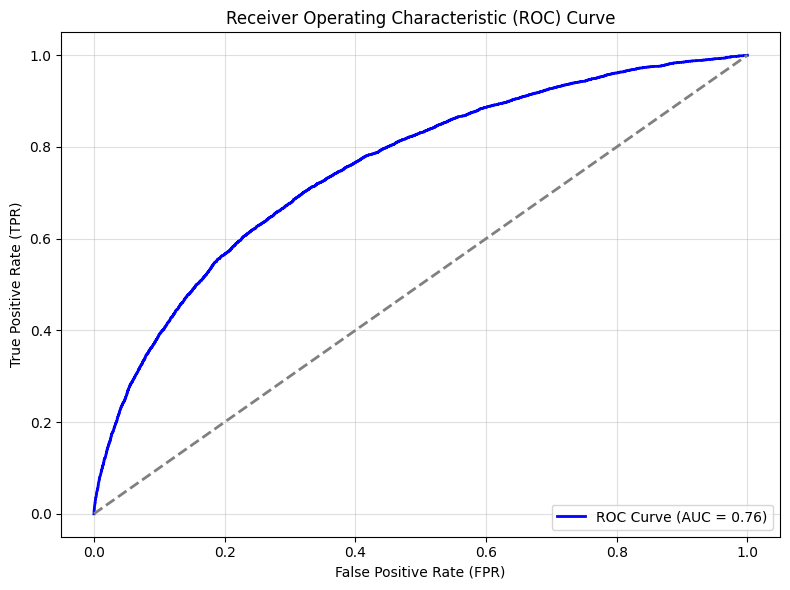

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

Comments:

* HiperParameters tunning - Optuna

In [ ]:
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'scale_pos_weight': class_counts[0] / class_counts[1],  # Obsługa niezbalansowanego zbioru
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = XGBClassifier(**param)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=5)

print("Best Parameters for XGBoost:", study_xgb.best_params)
print("Best Score for XGBoost:", study_xgb.best_value)

[I 2024-11-23 17:52:35,144] A new study created in memory with name: no-name-2606b032-bba5-4747-8a2c-0c3c0f01d14d
[I 2024-11-23 17:56:10,984] Trial 0 finished with value: 0.767824634042388 and parameters: {'n_estimators': 347, 'max_depth': 5, 'learning_rate': 0.20906018884124475, 'subsample': 0.9451574357009315, 'colsample_bytree': 0.662628980151401}. Best is trial 0 with value: 0.767824634042388.
[I 2024-11-23 18:03:45,589] Trial 1 finished with value: 0.8021771649836795 and parameters: {'n_estimators': 107, 'max_depth': 10, 'learning_rate': 0.05992678122736735, 'subsample': 0.885497545279774, 'colsample_bytree': 0.9686335926551117}. Best is trial 1 with value: 0.8021771649836795.
[I 2024-11-23 18:10:11,139] Trial 2 finished with value: 0.8360093967467371 and parameters: {'n_estimators': 124, 'max_depth': 10, 'learning_rate': 0.12951795855190815, 'subsample': 0.6505260375086829, 'colsample_bytree': 0.9687853005438634}. Best is trial 2 with value: 0.8360093967467371.
[I 2024-11-23 18:1

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.356966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23337
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Accuracy: 0.919760011706746

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.57      0.02      0.05      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503

AUC: 0.7620


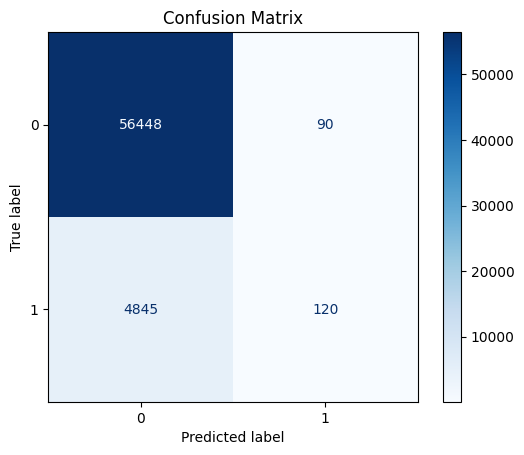

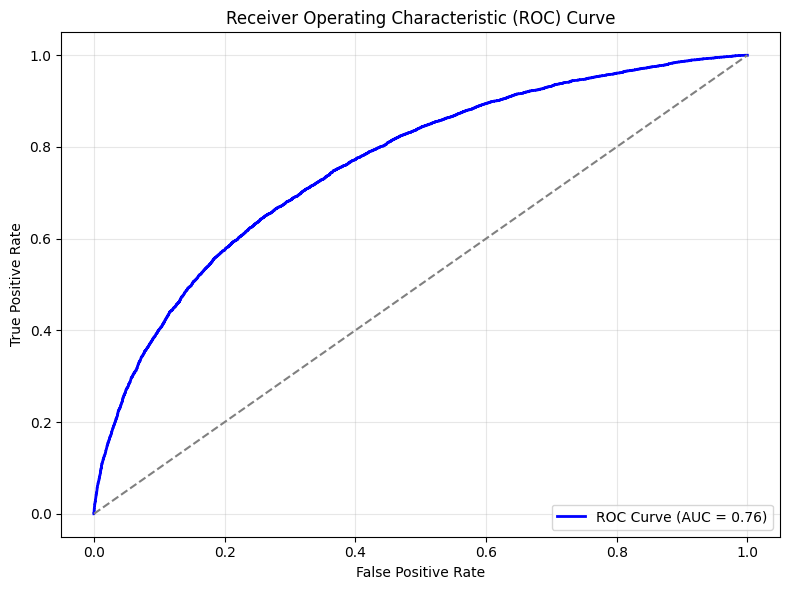

In [ ]:
from sklearn.ensemble import VotingClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
hgb_model = HistGradientBoostingClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)

voting_ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('hgb', hgb_model),
        ('lgb', lgb_model)
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

voting_ensemble.fit(X_train, y_train)
y_pred = voting_ensemble.predict(X_test)
y_pred_proba = voting_ensemble.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_score:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Comments:

Due to highly imbalanced datasets I used following KPIs:

 - Precision
Measures the proportion of positive predictions (class 1) that are correct.

- Recall (Sensitivity or True Positive Rate):
Critical when missing positives is costly (i.e.predicting loan defaults).

- F1-Score
Provides a balanced view of precision and recall.

- ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):
Measures the ability to distinguish between classes across all thresholds.
A higher AUC indicates better overall performance.

- Confusion Matrix results

- The best performanced achived: xgb model with parameters:

- precision recall f1-score

       0       0.95      0.88      0.91     
       1       0.24      0.44      0.31      

- The precision (24%) and recall (44%) for class 1 (clients who defaulted) highlight significant difficulty in identifying loan defaults effectively.

- The macro average F1-score (0.61) and an AUC of 0.76 indicate moderate overall performance, with the model performing much better on class 0 due to dataset imbalance

- To improved results I used hiperparameters tunning and model assumbling. They didn't improved much the results.

# Model deployment.

* Load the model and metadata

In [ ]:
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.6
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

model_filename = "best_xgboost_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as '{model_filename}'")

metadata = {
    "optimal_threshold": optimal_threshold,
    "n_estimators": 500,
    "max_depth": 7,
    "learning_rate": 0.05,
    "scale_pos_weight": scale_pos_weight,
    "random_state": 42
}

metadata_filename = "best_xgboost_metadata.json"
with open(metadata_filename, "w") as f:
    json.dump(metadata, f, indent=4)
print(f"Metadata saved as '{metadata_filename}'")

loaded_model = joblib.load(model_filename)
print("Model loaded successfully!")

with open(metadata_filename, "r") as f:
    loaded_metadata = json.load(f)
print("Metadata loaded successfully!")
print("Optimal Threshold:", loaded_metadata["optimal_threshold"])

Model saved as 'best_xgboost_model.pkl'
Metadata saved as 'best_xgboost_metadata.json'
Model loaded successfully!
Metadata loaded successfully!
Optimal Threshold: 0.6


* Upload the Model to Cloud Storage:

Before deploying, the model must be uploaded to a Google Cloud Storage (GCS) bucket.

In [ ]:
!pip install google-cloud-storage
!pip install google-cloud-aiplatform

In [6]:

import os
from google.cloud import storage

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "//content/capstone-442711-3d9cc12371b9.json"

print("GOOGLE_APPLICATION_CREDENTIALS is set to:", os.environ["GOOGLE_APPLICATION_CREDENTIALS"])
bucket_name = "capstone24_11_2024"
local_file_path = "/content/best_xgboost_model.pkl"
blob_name = "best_xgboost_model.pkl"

try:
    client = storage.Client()
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    blob.upload_from_filename(local_file_path)
    print(f"File {local_file_path} successfully uploaded to bucket {bucket_name} as {blob_name}.")

except Exception as e:
    print(f"An error occurred: {e}")

GOOGLE_APPLICATION_CREDENTIALS is set to: //content/capstone-442711-3d9cc12371b9.json
File /content/best_xgboost_model.pkl successfully uploaded to bucket capstone24_11_2024 as best_xgboost_model.pkl.


In [7]:
downloaded_file_path = "/content/downloaded_xgboost_model.pkl"

blob.download_to_filename(downloaded_file_path)
print(f"File downloaded from bucket {bucket_name} to {downloaded_file_path}.")


File downloaded from bucket capstone24_11_2024 to /content/downloaded_xgboost_model.pkl.


In [16]:
train_reduced = pd.read_csv("/content/train_reduced.csv")
test_reduced = pd.read_csv("/content/test_reduced.csv")

if 'TARGET' not in train_reduced.columns:
    raise ValueError("The TARGET column is missing in the train_reduced dataset.")

X_train = train_reduced.drop(columns=['TARGET'])
y_train = train_reduced['TARGET']
X_test = test_reduced

model_path = "/content/downloaded_xgboost_model.pkl"
model = joblib.load(model_path)
print("Model loaded successfully!")

y_pred_proba = model.predict_proba(X_test)[:, 1]
optimal_threshold = 0.6
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

submission_path = "/content/submission.csv"
sample_submission = pd.read_csv("/content/sample_submission.csv")
sample_submission['TARGET'] = y_pred_proba
sample_submission.to_csv(submission_path, index=False)
print(f"Submission file created: {submission_path}")

output_path = "/content/test_predictions.csv"
test_reduced['Predicted_TARGET'] = y_pred
test_reduced.to_csv(output_path, index=False)
print(f"Predictions with labels saved to {output_path}")

print("First  rows of the submission file:")
print(sample_submission.head())

print("First rows of the labeled predictions:")
print(test_reduced[['Predicted_TARGET']].head())

Model loaded successfully!
Submission file created: /content/submission.csv
Predictions with labels saved to /content/test_predictions.csv
First  rows of the submission file:
   SK_ID_CURR    TARGET
0      100001  0.113086
1      100005  0.069662
2      100013  0.280407
3      100028  0.170517
4      100038  0.101959
First rows of the labeled predictions:
   Predicted_TARGET
0                 0
1                 0
2                 0
3                 0
4                 0


All the first 5 rows in the labeled predictions have Predicted_TARGET as 0, meaning the model predicts no default for these individuals.

# Key insights:

- There is huge imbalance in data between customers paying and not paying loans (92% to 8%), which requires data balancing models adoption.
- Financial Behavior Patterns: Features related to receivables (AMT_RECEIVABLE_PRINCIPAL_mean, AMT_RECIVABLE_mean, etc.) consistently show that higher values are associated with default risk.
- Credit History: A shorter credit history (bureau_DAYS_CREDIT_mean) is a strong indicator of default likelihood.
- Cash Flow Indicators: Limited ATM withdrawals and higher balances may also indicate risky financial situations.
- The EXT_SOURCE features provide strong separation between the two target classes.
- Individuals with higher EXT_SOURCE values tend to have better credit behavior (TARGET = 0).
- Lower values across all three features are indicative of increased risk of default (TARGET = 1).
- Younger individuals may be more likely to default compared to older individuals.
- Longer employment durations might be slightly correlated with lower risk of default.
- There was a lot of missing data in the datasets, features with missing data above 50% were removed.
- For bulding models the best features (those above 0,04 and bellow 0,9) were selected.
- During the proces of features engeeniering most of the outliers were removed.
- Due to imbalanced data models dealing well with imbalacing were selected: xgb', 'hgb', 'lgb.
- Due to imbalanced dataset key KPIs taken into considaretion were: F1 Score, AUC- ROC, Recall, Precision
- The best performanced achived: xgb model with parameters:

- precision recall f1-score

       0       0.95      0.88      0.91     
       1       0.24      0.44      0.31      

- The precision (24%) and recall (44%) for class 1 (clients who defaulted) highlight significant difficulty in identifying loan defaults effectively.

- The macro average F1-score (0.61) and an AUC of 0.76 indicate moderate overall performance, with the model performing much better on class 0 due to dataset imbalance

- To improved results I used hiperparameters tunning and model assumbling. They didn't improved much the results.

 # Recommendations for Improvements

1. Balancing the Data
    Hybrid Approaches: Combine undersampling and oversampling to balance the dataset while preserving information from both classes.
2. Feature Engineering
    - Use domain knowledge to derive features like credit risk scores.
    - Interactions: Adding polynomial or interaction terms between existing features.
3. Hyperparameter Tuning
    Use more trials for parameters like learning rate, number of estimators, tree depth, etc. tunning,
4. Data Quality Optimizations
    Experiment with different imputation strategies:
    Use the median or a value derived from domain knowledge.
5. Advanced Techniques
    Ensemble Methods:
    Combine multiple models to improve predictive performance:
    Stacking: Train a meta-model on predictions from other models.
    Bagging: Train multiple models on bootstrapped datasets.
    Blending: Use validation set predictions to train a final model.
6. Use Neural Networks
    Anomaly Detection:
    Treat defaults as anomalies and use one-class classification techniques to detect them.
7. Robust Evaluation
    Stratified Cross-Validation:
    Use stratified k-fold cross-validation to ensure balanced class distributions in each fold.
    Cost-sensitive Learning:
    Assign higher weights to the minority class in your model's loss function.
8. Interpretability
    Use SHAP (SHapley Additive exPlanations) to explain predictions and identify important features to refine:

By combining these strategies—balancing the dataset, optimizing hyperparameters, engineering better features, and fine-tuning decision thresholds—you sytoema.tically the model’s performance can be further improved